In [ ]:
pip install flair

In [127]:
from datetime import datetime
import requests
import pandas as pd
import seaborn as sns

In [128]:
BEARER_TOKEN = 'AAAAAAAAAAAAAAAAAAAAALxdMQEAAAAAQLauISsmwNTTuOUiyjIY9Snq0JE%3DAM4UuquXRQvENnoZ6MCtSuAZws71IOWzApcPa1kWYInJwsQEJP'

In [129]:
params = {'q': 'stock market',
          'tweet_mode': 'extended',
          'lang': 'en',
          'count': '100'}
response=requests.get('https://api.twitter.com/1.1/search/tweets.json',params=params,
             headers={'authorization': 'Bearer '+BEARER_TOKEN})

In [130]:
print(response.json())

{'statuses': [{'created_at': 'Wed Feb 03 05:18:13 +0000 2021', 'id': 1356834354803146752, 'id_str': '1356834354803146752', 'full_text': "RT @DanPriceSeattle: So to recap we told people to stay home for the last 325 days and gave them $1,800. That's $5.54 a day.\n\nMeanwhile, th…", 'truncated': False, 'display_text_range': [0, 140], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'DanPriceSeattle', 'name': 'Dan Price', 'id': 2172596028, 'id_str': '2172596028', 'indices': [3, 19]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 2389533096, 'id_str': '2389533096', 'name': 'Linda Read', 'screen_name': 'Michigan1949', 'location': '', 'description': 'SWF, environmentalist, 

In [131]:
def get_data(tweet):
  data = {
      'id': tweet['id_str'],
      'created_at': tweet['created_at'],
      'text': tweet['full_text']
  }
  return data

In [132]:
df = pd.DataFrame()
for tweet in response.json()['statuses']:
  row = get_data(tweet)
  df = df.append(row, ignore_index=True)

In [133]:
tweets = df['text']
txts = tweets.to_list()

In [134]:
import flair
sentiment_model = flair.models.TextClassifier.load('en-sentiment')

2021-02-03 05:18:30,964 loading file /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt


In [135]:
values = []
confidence = []
for txt in txts:
  sentence = flair.data.Sentence(txt)
  sentiment_model.predict(sentence)
  v = sentence.labels[0].to_dict()['value']
  c = sentence.labels[0].to_dict()['confidence']
  values.append(v)
  confidence.append(c)

In [136]:
df['values'] = values
df['confidence'] = confidence

In [137]:
df.head(10)

,created_at,id,text,values,confidence
0,Wed Feb 03 05:18:13 +0000 2021,1356834354803146752,RT @DanPriceSeattle: So to recap we told peopl...,NEGATIVE,0.992397
1,Wed Feb 03 05:18:12 +0000 2021,1356834349556015104,RT @TooMetaPhysical: Alone on Valentine’s Day?...,NEGATIVE,0.709349
2,Wed Feb 03 05:18:11 +0000 2021,1356834347811172353,@christine_benz My 14 year old son texts me to...,NEGATIVE,0.977681
3,Wed Feb 03 05:18:11 +0000 2021,1356834346120830978,RT @BusinessFamous: The real pandemic is \n\nt...,NEGATIVE,0.999196
4,Wed Feb 03 05:18:10 +0000 2021,1356834341653897216,Funny things happening stock market. #Nifty Up...,POSITIVE,0.997330
5,Wed Feb 03 05:18:09 +0000 2021,1356834339057770496,RT @DanPriceSeattle: Last 12 years\nGDP: up 49...,POSITIVE,0.977143
6,Wed Feb 03 05:17:59 +0000 2021,1356834296191881219,RT @DanPriceSeattle: So to recap we told peopl...,NEGATIVE,0.992397
7,Wed Feb 03 05:17:53 +0000 2021,1356834269490892803,RT @DanPriceSeattle: Last 12 years\nGDP: up 49...,POSITIVE,0.977143
8,Wed Feb 03 05:17:53 +0000 2021,1356834268480069636,RT @CSoftproducts: is Cruelty Squad the first ...,POSITIVE,0.586574
9,Wed Feb 03 05:17:52 +0000 2021,1356834266827481089,marx wrote to engels once about pump and dump ...,NEGATIVE,0.999982


In [138]:
df.groupby(by='values').agg('count')

,created_at,id,text,confidence
values,,,,
NEGATIVE,43,43,43,43
POSITIVE,57,57,57,57


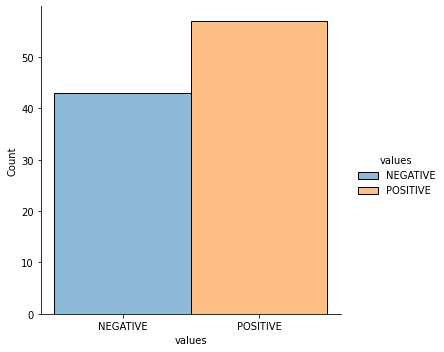

In [139]:
sns.displot(df,x='values',hue='values')